In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from math import fmod
import seaborn as sns
from tp_tree_source import (rand_gauss,rand_bi_gauss,rand_tri_gauss,
                               rand_clown,rand_checkers,plot_2d,frontiere_new)
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydot 
from sklearn.externals.six import StringIO

/home/dell/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [28]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


QUESTION 1

On peut utiliser la variance comme mesure d'homogénéité

QUESTION 2

In [7]:
n1 =114
n2 =114
n3 =114
n4 =114
sigma=0.1
df =rand_checkers(n1, n2, n3, n4, sigma)
df.shape

(448, 3)

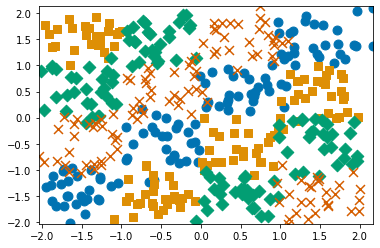

In [53]:
X1 = df[:,:2]
y1 = df[:,2]
#X1 =df[:,0:2]
#y1.shape
plot_2d(X1,y1)

AUTRE FACON DE FAIRE

In [43]:
dt_entropy = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)
dt_gini = tree.DecisionTreeClassifier(criterion='gini', max_depth=None)

In [46]:
#X = data[:, :2]
#Y = data[:, 2].astype(int)
# Fit both classifiers
dt_gini.fit(X1, y1)
dt_entropy.fit(X1, y1)
# Print their outputs
print("gini")
print(dt_gini.get_params())
print(dt_gini.score(X1, y1))
print("entropy")
print(dt_entropy.get_params())
print(dt_entropy.score(X1, y1))

gini
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
1.0
entropy
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
1.0


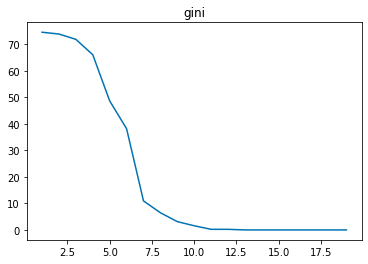

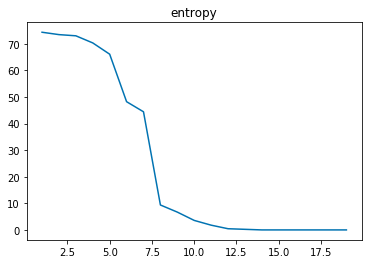

In [55]:
depths = range(1,20)
scores_list = []
for criterion in ['gini', 'entropy']:
    scores = []
    for max_depth in depths:
        tree_ = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth)
        tree_.fit(X1,y1)
        scores.append(tree_.score(X1,y1))
    scores_list.append(scores)
    plt.plot(depths, [(1-x)*100 for x in scores])
    plt.title(criterion)
    plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[-2.0437126 -2.0332203].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

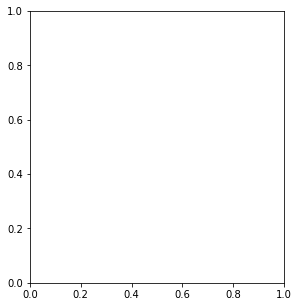

In [56]:
plt.figure(figsize=(10,5))
criterions = ['gini', 'entropy']
for i in range(2):
    optimal_tree = tree.DecisionTreeClassifier(
        criterion=criterions[i], max_depth=scores_list[i].index(max(scores_list[i])))
    optimal_tree.fit(X1, y1)
    plt.subplot(121+i)
    frontiere_new(optimal_tree.predict, X1, y1)
    plt.title(criterions[i])
    dot_data = StringIO()
    tree.export_graphviz(optimal_tree,out_file=dot_data)   
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    graph[0].write_pdf(criterions[i]+".pdf") 
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
criterions = ['gini', 'entropy']
for i in range(2):
    optimal_tree = tree.DecisionTreeClassifier(
        criterion=criterions[i], max_depth=scores_list[i].index(max(scores_list[i])))
    optimal_tree.fit(X1, y1)
    plt.subplot(121+i)
    frontiere_new(optimal_tree.predict, X1, y1)
    plt.title(criterions[i])
    dot_data = StringIO()
    tree.export_graphviz(optimal_tree,out_file=dot_data)   
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
    graph[0].write_pdf(criterions[i]+".pdf") 
plt.show()